<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Check-Stats" data-toc-modified-id="Check-Stats-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check Stats</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Add-time-series-columns" data-toc-modified-id="Add-time-series-columns-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Add time series columns</a></span></li><li><span><a href="#Add-derived-columns" data-toc-modified-id="Add-derived-columns-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Add derived columns</a></span></li></ul></li></ul></li><li><span><a href="#EDA-and-charts" data-toc-modified-id="EDA-and-charts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA and charts</a></span><ul class="toc-item"><li><span><a href="#Sensor-Trend-charts" data-toc-modified-id="Sensor-Trend-charts-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Sensor Trend charts</a></span></li><li><span><a href="#Histgram" data-toc-modified-id="Histgram-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Histgram</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Heatmap</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Train test split</a></span></li><li><span><a href="#Train-boosting-blending---Carbin" data-toc-modified-id="Train-boosting-blending---Carbin-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Train boosting blending - Carbin</a></span><ul class="toc-item"><li><span><a href="#Blender" data-toc-modified-id="Blender-3.4.2.1"><span class="toc-item-num">3.4.2.1&nbsp;&nbsp;</span>Blender</a></span></li></ul></li><li><span><a href="#Train-boosting-blending---benzene" data-toc-modified-id="Train-boosting-blending---benzene-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Train boosting blending - benzene</a></span></li><li><span><a href="#Train-boost-blend---nitrogen" data-toc-modified-id="Train-boost-blend---nitrogen-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>Train boost blend - nitrogen</a></span></li></ul></li><li><span><a href="#Scoring" data-toc-modified-id="Scoring-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Scoring</a></span></li></ul></li></ul></div>

In [130]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.model_selection import LeaveOneGroupOut
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline  

# Load Data

In [79]:
sDir = ''
sTrain = 'train.csv'
sTest = 'test.csv'
pdTrain = pd.read_csv(sDir + sTrain)
trainSize, col = pdTrain.shape
pdTest = pd.read_csv(sDir + sTest)
testSize, col = pdTest.shape
pdAll = pd.concat([pdTrain, pdTest])
pdAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9358 entries, 0 to 2246
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               9358 non-null   object 
 1   deg_C                   9358 non-null   float64
 2   relative_humidity       9358 non-null   float64
 3   absolute_humidity       9358 non-null   float64
 4   sensor_1                9358 non-null   float64
 5   sensor_2                9358 non-null   float64
 6   sensor_3                9358 non-null   float64
 7   sensor_4                9358 non-null   float64
 8   sensor_5                9358 non-null   float64
 9   target_carbon_monoxide  7111 non-null   float64
 10  target_benzene          7111 non-null   float64
 11  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11), object(1)
memory usage: 950.4+ KB


In [80]:
print(trainSize)
print(testSize)

7111
2247


# Check Stats

In [82]:
rows, cols = pdAll.shape
print(f'rows: {rows} | columns: {cols}\n')
pdAll.describe().T

rows: 9358 | columns: 12



,count,mean,std,min,25%,50%,75%,max
deg_C,9358.0,18.460098,8.737964,-1.8000,12.00000,18.1000,24.4000,46.100
relative_humidity,9358.0,48.394262,17.288206,8.9000,34.50000,48.2000,61.6000,90.800
absolute_humidity,9358.0,0.994272,0.424988,0.1847,0.69215,0.9768,1.2961,2.231
sensor_1,9358.0,1095.164800,215.526721,620.3000,935.60000,1065.6000,1217.1500,2088.300
sensor_2,9358.0,913.667995,283.138383,356.2000,708.00000,890.1000,1099.9500,2302.600
sensor_3,9358.0,870.557256,318.543024,310.6000,661.00000,814.1000,994.0000,2567.400
sensor_4,9358.0,1415.178158,379.783052,523.4000,1175.50000,1434.3500,1659.1000,2913.800
sensor_5,9358.0,1005.903035,395.204515,218.8000,715.32500,937.1500,1251.6000,2594.600
target_carbon_monoxide,7111.0,2.086219,1.447109,0.1000,1.00000,1.7000,2.8000,12.500
target_benzene,7111.0,10.237083,7.694426,0.1000,4.50000,8.5000,14.2000,63.700


In [83]:
#define lambda function, detect if any columns contain isnull() value 
stats = pdAll[['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1', 'sensor_2','sensor_3','sensor_4','sensor_5']]\
.apply(lambda col: sum(col.isna())/rows )
stats[stats>0].count()

0

In [84]:
#or use pd.isna() function to check missing value columns 
stats = pd.isna(pdAll.count())
stats[stats>0].count()

0

### Add time series columns

In [113]:
pdAll['date_time'] = pd.to_datetime(pdAll['date_time'])
pdAll['year']=pdAll['date_time'].dt.year
pdAll['month']=pdAll['date_time'].dt.month
pdAll['week']=pdAll['date_time'].dt.week
pdAll['day']=pdAll['date_time'].dt.day
pdAll['dayofweek']=pdAll['date_time'].dt.dayofweek
pdAll['time'] = pdAll['date_time'].dt.date - pdAll['date_time'].dt.date.min()
pdAll['time']=pdAll['time'].apply(lambda x: x.days)
pdAll['hour'] = pdAll['date_time'].dt.hour
pdAll['working_hours'] = pdAll['hour'].isin(np.arange(8,20,1)).astype('int')
pdAll['is_weekend']=(pdAll['dayofweek']>=5).astype('int')

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,...,Dew_Point,year,month,week,day,dayofweek,time,hour,working_hours,is_weekend
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,...,1.727907,2010,3,10,10,2,0,18,1,0
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,...,1.604653,2010,3,10,10,2,0,19,1,0
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,...,4.095906,2010,3,10,10,2,0,20,0,0
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,...,4.084138,2010,3,10,10,2,0,21,0,0
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,...,4.133561,2010,3,10,10,2,0,22,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,2011-04-04 10:00:00,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8,NaN,...,4.020769,2011,4,14,4,0,390,10,1,0
2243,2011-04-04 11:00:00,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0,NaN,...,1.686915,2011,4,14,4,0,390,11,1,0
2244,2011-04-04 12:00:00,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1,NaN,...,1.066649,2011,4,14,4,0,390,12,1,0
2245,2011-04-04 13:00:00,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5,NaN,...,-2.458663,2011,4,14,4,0,390,13,1,0


### Add derived columns 

In [114]:
pdAll['Humidity'] = (pdAll['absolute_humidity'] * 100)/pdAll['relative_humidity']
pdAll['Dew_Point'] = 243.12*(np.log(pdAll['relative_humidity'] * 0.01) + \
                 (17.62 * pdAll['deg_C'])/(243.12+pdAll['deg_C']))/(17.62-(np.log(pdAll['relative_humidity'] * 0.01) + \
                  17.62 * pdAll['deg_C']/(243.12+pdAll['deg_C'])))
pdAll.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,...,Dew_Point,year,month,week,day,dayofweek,time,hour,working_hours,is_weekend
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,...,1.727907,2010,3,10,10,2,0,18,1,0
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,...,1.604653,2010,3,10,10,2,0,19,1,0
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,...,4.095906,2010,3,10,10,2,0,20,0,0
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,...,4.084138,2010,3,10,10,2,0,21,0,0
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,...,4.133561,2010,3,10,10,2,0,22,0,0


In [115]:
stdCol =['deg_C', 'relative_humidity', 'absolute_humidity','sensor_1','sensor_2','sensor_3','sensor_4','sensor_5',\
         'Humidity','Dew_Point', 'year','month', 'week', 'day', 'dayofweek', 'time', 'hour']
tgtCol = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']
pdStd = pd.DataFrame(pdAll, columns=stdCol)
pdStd

# EDA and charts

## Sensor Trend charts

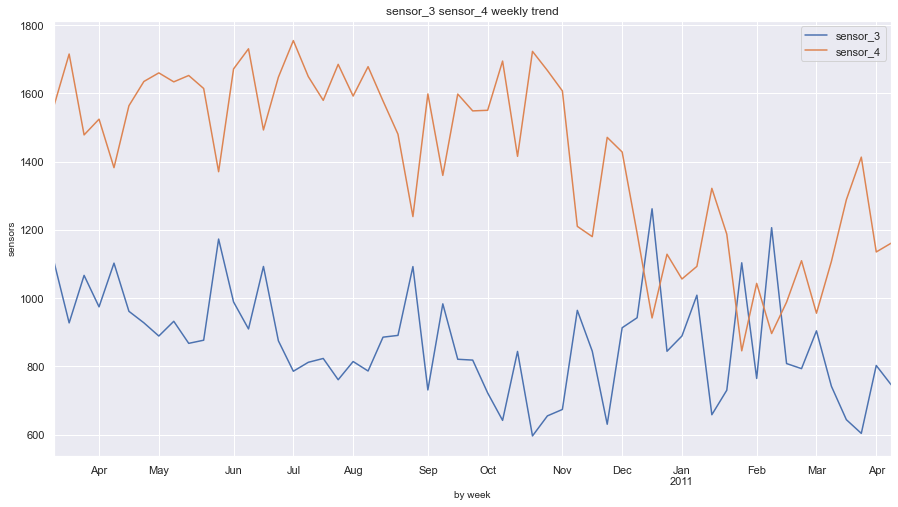

In [118]:
sns.set()
# init figure and ax
y = pdAll.loc[:, ['date_time','sensor_3','sensor_4' ]].\
    set_index('date_time').resample('W').mean() 
fig,ax=plt.subplots(1,1,figsize=(15,8))
# plotting multi-series by passing y with multiple columns
# set up x label, y label, and figure title
y.plot(ax=ax,label='by week(train)',alpha=1)
ax.set_ylabel('sensors',fontsize=10)
ax.set_xlabel('by week', fontsize=10)
ax.set_title('sensor_3 sensor_4 weekly trend', fontsize=12);

# sensor_4 looks consistently higher than normakm until Mid Nov drop 
# sensor_3 looks lower especially in Oct to Nov
# sensor_3 and sensor_4 assembles the opporsite pattern

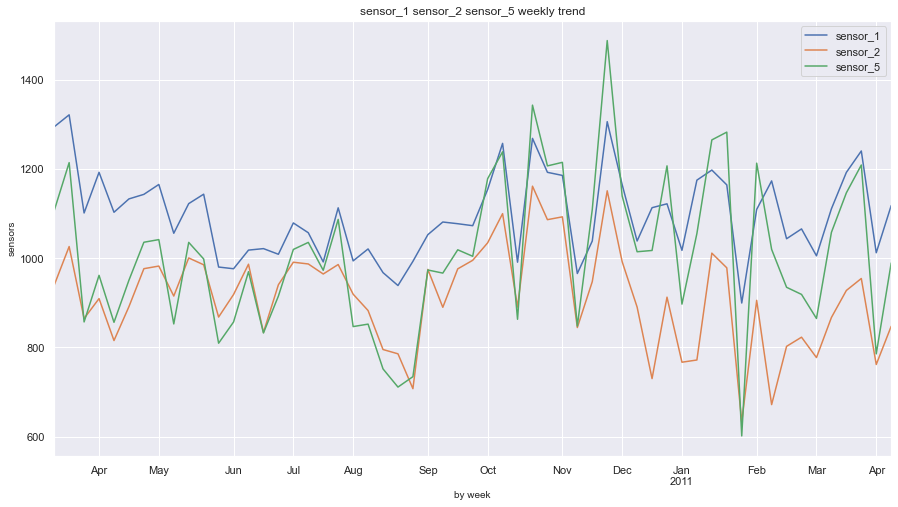

In [120]:
# init figure and ax
y = pdAll.loc[:, ['date_time','sensor_1','sensor_2', 'sensor_5' ]].\
    set_index('date_time').resample('W').mean() 
fig,ax=plt.subplots(1,1,figsize=(15,8))
# plotting multi-series by passing y with multiple columns
# set up x label, y label, and figure title
y.plot(ax=ax,label='by week(train)',alpha=1)
ax.set_ylabel('sensors',fontsize=10)
ax.set_xlabel('by week', fontsize=10)
ax.set_title('sensor_1 sensor_2 sensor_5 weekly trend', fontsize=12);

# sensor_1, sensor_2 and sensor_5 assemble the similar patterns



## Histgram

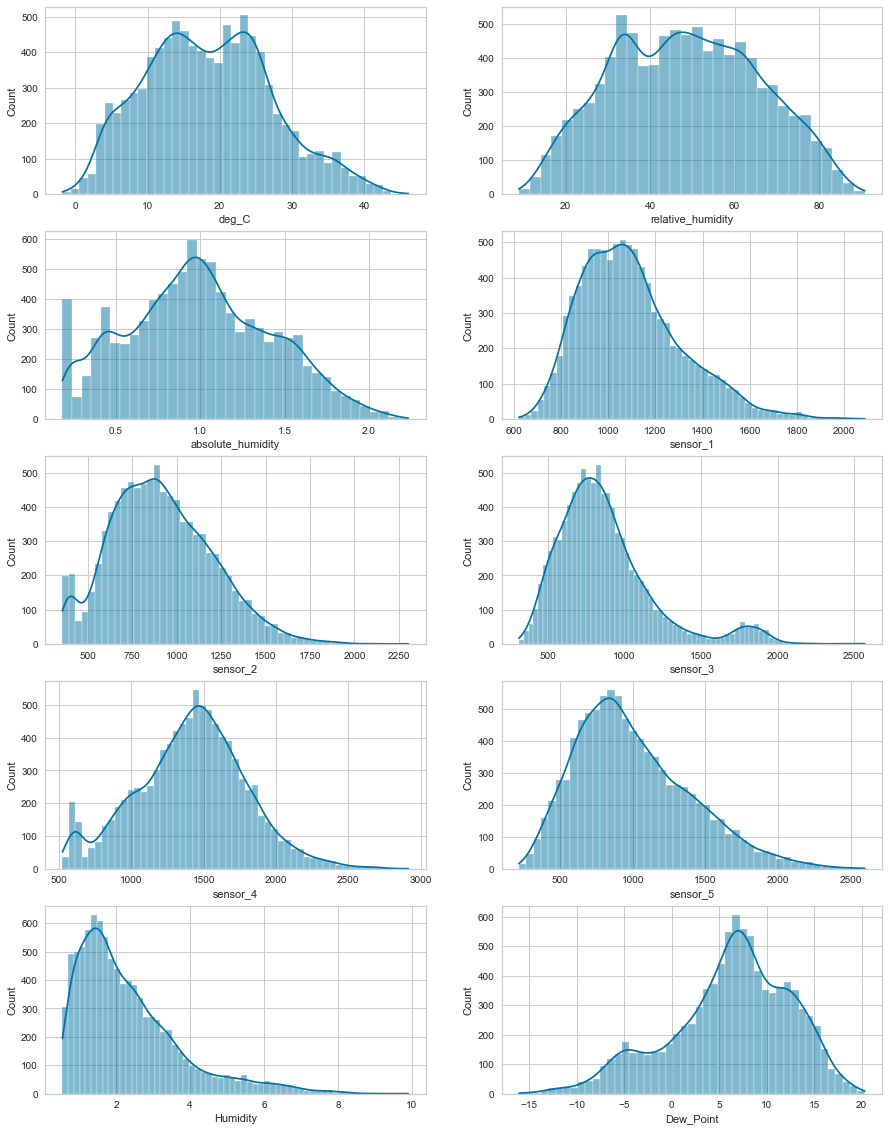

In [194]:
stdCol2 =['deg_C', 'relative_humidity', 'absolute_humidity','sensor_1','sensor_2','sensor_3','sensor_4','sensor_5',\
         'Humidity','Dew_Point']
rows = int(len(stdCol2)/2)
fig, axe = plt.subplots(nrows = rows, ncols = 2, figsize=(15,20), sharex=False, sharey = False)
for i in range(rows):  
    sns.histplot(pdStd[stdCol[i*2]], kde=True, ax=axe[i,0]);
    sns.histplot(pdStd[stdCol[i*2 + 1]], kde=True, ax=axe[i,1]);

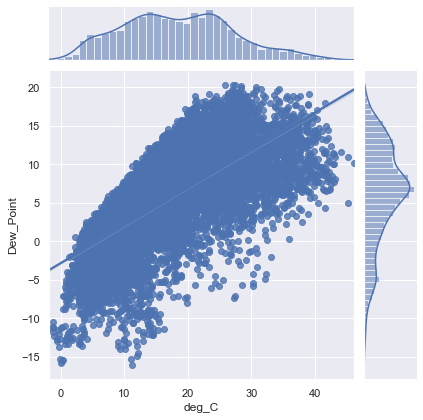

In [122]:
sns.jointplot("deg_C", "Dew_Point", data=pdStd, kind="reg");

## Heatmap

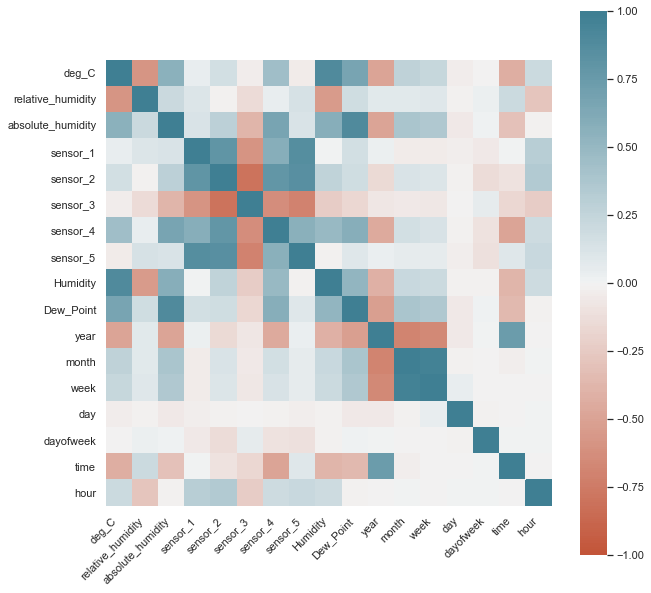

In [123]:
corr = pdStd.corr()
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Training

### Train test split

In [124]:
# pdStd = pdStd.drop(columns=['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'])
pdTrain = pdStd[: trainSize-1]
pdTest = pdStd[trainSize :]
pdTrain

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,Humidity,Dew_Point,year,month,week,day,dayofweek,time,hour
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,1.647391,1.727907,2010,3,10,10,2,0,18
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,1.601545,1.604653,2010,3,10,10,2,0,19
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,1.334875,4.095906,2010,3,10,10,2,0,20
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,1.260737,4.084138,2010,3,10,10,2,0,21
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.336949,4.133561,2010,3,10,10,2,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7105,9.1,34.3,0.3958,957.9,741.9,970.3,915.1,866.0,1.153936,-5.848330,2010,12,52,31,4,296,19
7106,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.209688,-6.669204,2010,12,52,31,4,296,20
7107,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.134337,-6.275931,2010,12,52,31,4,296,21
7108,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.245665,-5.290964,2010,12,52,31,4,296,22


In [125]:
pdTrain_cab = pdTrain.copy(deep=True)
pdTrain_cab['target_carbon_monoxide'] =  np.log1p(pdAll[: trainSize-1]['target_carbon_monoxide'].tolist());

In [126]:
pdTrain_ben = pdTrain.copy(deep=True)
pdTrain_ben['target_benzene'] = np.log1p( pdAll[: trainSize-1]['target_benzene'].tolist());

In [127]:
pdTrain_nio = pdTrain.copy(deep=True)
pdTrain_nio['target_nitrogen_oxides'] = np.log1p(pdAll[: trainSize-1]['target_nitrogen_oxides'].tolist());

In [128]:
pdTrain_cab

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,Humidity,Dew_Point,year,month,week,day,dayofweek,time,hour,target_carbon_monoxide
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,1.647391,1.727907,2010,3,10,10,2,0,18,1.252763
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,1.601545,1.604653,2010,3,10,10,2,0,19,1.131402
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,1.334875,4.095906,2010,3,10,10,2,0,20,1.163151
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,1.260737,4.084138,2010,3,10,10,2,0,21,1.163151
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.336949,4.133561,2010,3,10,10,2,0,22,0.916291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7105,9.1,34.3,0.3958,957.9,741.9,970.3,915.1,866.0,1.153936,-5.848330,2010,12,52,31,4,296,19,0.788457
7106,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.209688,-6.669204,2010,12,52,31,4,296,20,0.832909
7107,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.134337,-6.275931,2010,12,52,31,4,296,21,0.875469
7108,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.245665,-5.290964,2010,12,52,31,4,296,22,0.955511


### Train boosting blending - Carbin

In [174]:
from pycaret.regression import *
exp_reg = setup(data = pdTrain_cab, target = 'target_carbon_monoxide', normalize = True,
                fold_strategy= LeaveOneGroupOut(), fold_groups = pdTrain_cab['week'],  silent = True )

,Description,Value
0,session_id,637
1,Target,target_carbon_monoxide
2,Original Data,"(7110, 18)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4976, 31)"


In [175]:
top5_carbin = compare_models(n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0740,0.0105,0.1018,0.9431,0.0519,0.0946,0.3023
et,Extra Trees Regressor,0.0763,0.0112,0.1050,0.9396,0.0536,0.0976,2.9302
gbr,Gradient Boosting Regressor,0.0830,0.0131,0.1135,0.9294,0.0580,0.1081,1.6967
rf,Random Forest Regressor,0.0826,0.0136,0.1159,0.9265,0.0591,0.1069,4.7014
knn,K Neighbors Regressor,0.1022,0.0182,0.1341,0.9016,0.0684,0.1287,0.0730
lr,Linear Regression,0.1062,0.0218,0.1463,0.8830,0.0745,0.1409,0.1679
ridge,Ridge Regression,0.1061,0.0218,0.1463,0.8830,0.0745,0.1409,0.0156
br,Bayesian Ridge,0.1060,0.0218,0.1463,0.8830,0.0745,0.1409,0.0205
huber,Huber Regressor,0.1024,0.0235,0.1511,0.8740,0.0759,0.1342,0.1705
ada,AdaBoost Regressor,0.1172,0.0237,0.1531,0.8726,0.0804,0.1626,0.7367


#### Blender

In [176]:
blender_et_lightgbm_boosting = finalize_model(blend_models(estimator_list = top5_carbin, optimize ='RMSLE'))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0784,0.0128,0.1132,0.9324,0.0586,0.0924
1,0.0650,0.0069,0.0833,0.9644,0.0437,0.0791
2,0.0748,0.0095,0.0972,0.9372,0.0520,0.0921
3,0.0881,0.0160,0.1263,0.9239,0.0639,0.1220
4,0.0862,0.0183,0.1355,0.9045,0.0582,0.0903
5,0.0701,0.0083,0.0913,0.9507,0.0442,0.0758
6,0.0850,0.0157,0.1255,0.9153,0.0589,0.0871
7,0.0729,0.0114,0.1066,0.9412,0.0524,0.0816
8,0.0753,0.0094,0.0970,0.9499,0.0523,0.1157
9,0.0778,0.0124,0.1113,0.9297,0.0663,0.1579


In [177]:
t = predict_model(blender_et_lightgbm_boosting)
t.info()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0392,0.0027,0.0517,0.9850,0.0263,0.0464


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   deg_C                   2134 non-null   float32
 1   relative_humidity       2134 non-null   float32
 2   absolute_humidity       2134 non-null   float32
 3   sensor_1                2134 non-null   float32
 4   sensor_2                2134 non-null   float32
 5   sensor_3                2134 non-null   float32
 6   sensor_4                2134 non-null   float32
 7   sensor_5                2134 non-null   float32
 8   Humidity                2134 non-null   float32
 9   Dew_Point               2134 non-null   float32
 10  day                     2134 non-null   float32
 11  time                    2134 non-null   float32
 12  hour                    2134 non-null   float32
 13  year_2010               2134 non-null   float32
 14  month_10                2134 non-null   

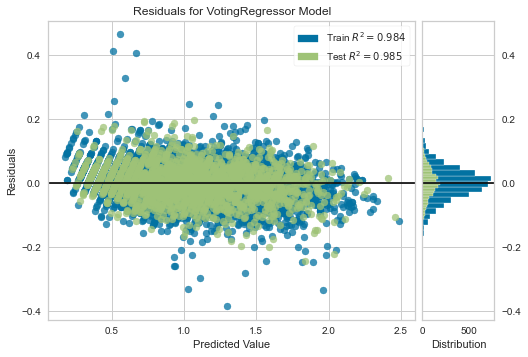

In [178]:
plot_model(blender_et_lightgbm_boosting)

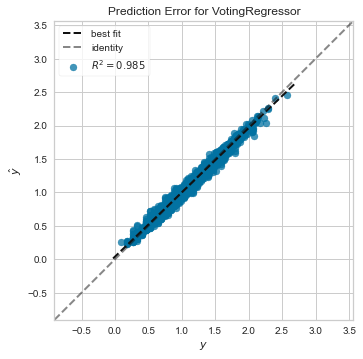

In [179]:
plot_model(blender_et_lightgbm_boosting, plot = 'error')

In [180]:
save_model(blender_et_lightgbm_boosting,'blender_carbin')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='target_carbon_monoxide',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,...
                                                                     min_samples_leaf=1,
                                                                     min_samples_split=2,
                                                                     min_weight_fraction_leaf=0.0,
                              

### Train boosting blending - benzene

In [181]:
from pycaret.regression import *
exp_reg_ben = setup(data = pdTrain_ben, target = 'target_benzene', normalize = True,
                fold_strategy= LeaveOneGroupOut(), fold_groups = pdTrain_ben['week'],  silent = True )
# exp_reg = setup(data = pdTrain_ben, target = 'target_benzene', \
#                normalize = True, transformation = True, train_size = 0.90, fold_strategy='timeseries', silent = True )
# exo_reg_ben = setup(data = pdTrain_ben, target = 'target_benzene', session_id = 124,\
#                transformation = True, transform_target = False, remove_multicollinearity = True, \
#                multicollinearity_threshold = 0.95, fold = 5, train_size = 0.90, fold_strategy='timeseries' )

,Description,Value
0,session_id,4465
1,Target,target_benzene
2,Original Data,"(7110, 18)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4976, 31)"


In [182]:
top5_ben = compare_models(n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0698,0.0075,0.0865,0.9865,0.0299,0.0383,0.2184
gbr,Gradient Boosting Regressor,0.0748,0.0083,0.0912,0.9850,0.0314,0.0428,1.6405
et,Extra Trees Regressor,0.0743,0.0085,0.0918,0.9847,0.0312,0.0383,2.6926
rf,Random Forest Regressor,0.0749,0.0086,0.0925,0.9845,0.0316,0.0389,4.3184
ada,AdaBoost Regressor,0.0910,0.0115,0.1071,0.9794,0.0415,0.0949,0.8086
dt,Decision Tree Regressor,0.1018,0.0168,0.1295,0.9698,0.0442,0.0523,0.0809
br,Bayesian Ridge,0.1030,0.0188,0.1362,0.9667,0.0516,0.0879,0.0188
lr,Linear Regression,0.1031,0.0188,0.1362,0.9666,0.0516,0.0879,0.0142
ridge,Ridge Regression,0.1030,0.0188,0.1362,0.9666,0.0516,0.0879,0.0128
huber,Huber Regressor,0.0989,0.0209,0.1412,0.9634,0.0550,0.0847,0.1607


In [183]:
blender_boosting_ben = finalize_model( blend_models(estimator_list = top5_ben, optimize ='RMSLE'))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0698,0.0076,0.0870,0.9870,0.0305,0.0448
1,0.0686,0.0071,0.0845,0.9863,0.0297,0.0419
2,0.0775,0.0088,0.0937,0.9835,0.0320,0.0480
3,0.0697,0.0071,0.0844,0.9895,0.0292,0.0547
4,0.0755,0.0083,0.0913,0.9836,0.0303,0.0417
5,0.0732,0.0077,0.0877,0.9879,0.0318,0.0560
6,0.0713,0.0074,0.0859,0.9889,0.0294,0.0520
7,0.0760,0.0086,0.0930,0.9873,0.0338,0.0621
8,0.0776,0.0088,0.0939,0.9859,0.0336,0.0512
9,0.0806,0.0092,0.0960,0.9821,0.0309,0.0484


In [184]:
predict_model(blender_boosting_ben)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0471,0.0032,0.0563,0.9946,0.0200,0.0340


,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,Humidity,Dew_Point,...,month_9,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,target_benzene,Label
0,1.034713,-1.221873,-0.506708,1.088774,1.917643,-0.733729,1.697484,0.904161,0.556976,-0.059229,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.186353,3.259071
1,1.072723,-0.037499,2.014581,-0.316113,-0.223865,-0.422791,0.468040,-0.674157,0.987313,1.672227,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.151762,2.135554
2,0.033776,0.612181,0.590303,1.471673,1.909813,-1.247825,1.235190,1.498814,-0.244906,0.867070,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.238678,3.284140
3,-0.650409,-0.008752,-0.624937,-0.419325,-0.290064,0.427041,-0.226116,-0.631196,-0.588422,-0.666481,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.116256,2.082292
4,-0.561718,-0.204231,-0.919754,-1.469419,-1.683450,3.055068,-1.256044,-1.830979,-0.676104,-0.747883,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.470004,0.502864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,-1.144542,-0.928654,-1.705598,-1.010032,-0.551302,0.036939,-1.560614,-0.840765,-0.895489,-2.416917,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.856298,1.845970
2130,2.099000,-1.170128,1.387215,1.024266,1.555683,-0.862809,1.456748,1.089106,2.409711,1.399481,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.152736,3.158341
2131,0.350528,0.456948,1.335647,-0.017534,0.377266,-0.718468,0.542751,0.394908,0.206463,1.173089,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.610070,2.585588
2132,-1.131872,1.003140,-0.541925,-0.276947,-0.436699,-0.479701,-0.686120,0.061169,-0.897431,-0.476157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.054124,2.040701


In [185]:
save_model(blender_boosting_ben,'blender_benzene')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='target_benzene',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                                                                     min_impurity_split=None,
                                                                     min_samples_leaf=1,
                                                                     min_samples_split=2,
 

### Train boost blend - nitrogen

In [161]:
from pycaret.regression import *
exp_reg_nig = setup(data = pdTrain_nio, target = 'target_nitrogen_oxides', normalize = True,
                fold_strategy= LeaveOneGroupOut(), fold_groups = pdTrain_nio['week'],  silent = True )
# exp_reg = setup(data = pdTrain_nio, target = 'target_nitrogen_oxides', \
#                normalize = True, transformation = True, train_size = 0.90, fold_strategy='timeseries', silent = True )
# exo_reg_nig = setup(data = pdTrain_nio, target = 'target_nitrogen_oxides', session_id = 125,\
#                transformation = True, transform_target = False, remove_multicollinearity = True, \
#                multicollinearity_threshold = 0.95, fold = 5, train_size = 0.90, fold_strategy='timeseries')

,Description,Value
0,session_id,2518
1,Target,target_nitrogen_oxides
2,Original Data,"(7110, 18)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4976, 31)"


In [162]:
top5_nig = compare_models(n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.1505,0.0434,0.2068,0.9435,0.0386,0.0329,0.2493
et,Extra Trees Regressor,0.1515,0.0438,0.2076,0.9430,0.0391,0.0333,2.6470
rf,Random Forest Regressor,0.1636,0.0505,0.2228,0.9345,0.0417,0.0359,4.6407
gbr,Gradient Boosting Regressor,0.1713,0.0543,0.2313,0.9296,0.0429,0.0374,1.6679
knn,K Neighbors Regressor,0.1930,0.0685,0.2602,0.9106,0.0490,0.0426,0.0751
lr,Linear Regression,0.2416,0.1048,0.3215,0.8646,0.0577,0.0521,0.1565
ridge,Ridge Regression,0.2415,0.1048,0.3215,0.8646,0.0577,0.0521,0.0149
br,Bayesian Ridge,0.2414,0.1049,0.3215,0.8646,0.0577,0.0520,0.0181
dt,Decision Tree Regressor,0.2362,0.1047,0.3213,0.8633,0.0602,0.0515,0.0893
huber,Huber Regressor,0.2365,0.1099,0.3281,0.8585,0.0586,0.0510,0.1686


In [163]:
blender_boosting_nig = finalize_model(blend_models(estimator_list = top5_nig, optimize='RMSLE'))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1576,0.0434,0.2083,0.9538,0.0415,0.0365
1,0.1743,0.0488,0.2209,0.9410,0.0393,0.0370
2,0.1710,0.0601,0.2452,0.9370,0.0474,0.0401
3,0.1471,0.0349,0.1869,0.9491,0.0325,0.0301
4,0.1645,0.0603,0.2457,0.9088,0.0521,0.0381
5,0.1654,0.0516,0.2271,0.9334,0.0398,0.0344
6,0.1317,0.0297,0.1725,0.9621,0.0320,0.0286
7,0.1591,0.0475,0.2180,0.9403,0.0405,0.0341
8,0.1372,0.0304,0.1743,0.9642,0.0322,0.0300
9,0.1496,0.0462,0.2149,0.9466,0.0423,0.0347


In [164]:
predict_model(blender_boosting_nig)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0800,0.0110,0.1050,0.9858,0.0193,0.0172


,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,Humidity,Dew_Point,...,month_9,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,target_nitrogen_oxides,Label
0,0.737876,-1.152753,-0.408236,-0.098422,0.631455,-0.376684,0.198864,0.453452,0.549830,-0.311269,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.318120,5.208887
1,-0.255174,0.844276,0.286758,-0.766537,-0.654150,-0.093687,-0.681981,-0.406303,-0.484614,0.647116,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.517051,5.138588
2,1.404100,-1.032932,0.561570,0.413984,0.872484,-0.779176,0.693750,0.252222,1.293657,0.746542,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.226821,5.148444
3,0.461331,0.553280,1.581160,-0.953203,-1.280470,1.230394,-0.203391,-1.411144,0.264978,1.405049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.005683,3.125685
4,1.177836,-1.335339,0.063474,0.667646,1.785557,-0.464378,0.475897,2.598512,1.408922,-0.095017,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.126432,6.196238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,-2.140714,0.051170,-1.689195,-1.459140,-1.159956,0.866769,-1.738366,-0.619078,-1.227468,-2.643048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.584968,4.749184
2130,1.856630,-1.181283,0.768923,0.912991,2.104920,-0.727781,2.074913,1.466164,1.811604,1.058432,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.628700,5.613149
2131,0.863579,-0.433823,0.887909,-0.531357,-0.003017,-0.358374,0.521641,0.297873,0.696228,0.910859,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.415220,4.350335
2132,-0.355736,-0.736230,-1.003163,0.011544,0.156487,0.237815,-0.085602,-0.500491,-0.431249,-1.094927,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.924351,4.837442


In [165]:
save_model(blender_boosting_nig,'blender_nitrogen')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='target_nitrogen_oxides',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,...
                                                                         n_estimators=100,
                                                                         n_iter_no_change=None,
                                                                         presort='deprecated',
                          

## Scoring

In [186]:
blender_carbin = load_model('blender_carbin')
predict_carbin = predict_model(blender_carbin, data=pdTest)

Transformation Pipeline and Model Successfully Loaded


In [187]:
blender_benzene = load_model('blender_benzene')
predict_benzene = predict_model(blender_benzene, data=pdTest)

Transformation Pipeline and Model Successfully Loaded


In [188]:
blender_nitrogen = load_model('blender_nitrogen')
predict_nitrogen = predict_model(blender_nitrogen, data = pdTest)

Transformation Pipeline and Model Successfully Loaded


In [189]:
predict_nitrogen

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,Humidity,Dew_Point,year,month,week,day,dayofweek,time,hour,Label
0,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1,1.059322,-4.376278,2011,1,52,1,5,297,0,5.466323
1,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0,0.882785,-4.039227,2011,1,52,1,5,297,1,5.765782
2,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8,0.910485,-3.441881,2011,1,52,1,5,297,2,5.685348
3,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0,0.897323,-3.978058,2011,1,52,1,5,297,3,5.783154
4,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3,0.808696,-3.175343,2011,1,52,1,5,297,4,5.443386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8,2.636934,4.020769,2011,4,14,4,0,390,10,6.130889
2243,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0,3.164000,1.686915,2011,4,14,4,0,390,11,5.967414
2244,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1,3.371579,1.066649,2011,4,14,4,0,390,12,5.968134
2245,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5,4.046457,-2.458663,2011,4,14,4,0,390,13,5.774354


In [190]:
pdSub = pd.read_csv('sample_submission.csv')

In [191]:
pdSub['target_carbon_monoxide']= np.exp(predict_carbin['Label'])-1
pdSub['target_benzene'] = np.exp(predict_benzene['Label'])-1
pdSub['target_nitrogen_oxides'] = np.exp(predict_nitrogen['Label'])-1

In [192]:
pdSub.to_csv('submission4.csv', index = False)

In [193]:
pdSub

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.598539,5.114509,235.588676
1,2011-01-01 01:00:00,2.205776,7.378547,318.188459
2,2011-01-01 02:00:00,1.888455,7.542951,293.520268
3,2011-01-01 03:00:00,1.945954,8.394971,323.782015
4,2011-01-01 04:00:00,1.405067,6.455151,230.223894
...,...,...,...,...
2242,2011-04-04 10:00:00,2.893488,12.089362,458.844987
2243,2011-04-04 11:00:00,2.426750,9.899271,389.494455
2244,2011-04-04 12:00:00,2.445478,12.394427,389.775923
2245,2011-04-04 13:00:00,2.025136,10.607423,320.936541
